# Locally Linear Embedding

In [5]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neighbors import NearestNeighbors
from sklearn import (manifold, datasets, decomposition, ensemble, random_projection)
import scipy as scipy
import matplotlib.pyplot as plt
from matplotlib import offsetbox
%matplotlib inline
#import sklearn.linear_model.SGDClassifier as sgd

mnist = load_digits(6)
data = mnist.data
target = mnist.target
n_samples, n_features = mnist.data.shape

In [6]:
class LLE(object):
    
    def __init__(self, n_neighbors=20):
        self.n_neighbors = n_neighbors
        

    def fit_transform(self, data):
        self.data = data
        self.n_samples, self.n_features = self.data.shape
        self.weights = np.zeros((self.n_samples,self.n_samples))
        nbrs = NearestNeighbors(n_neighbors= (self.n_neighbors + 1), algorithm='ball_tree').fit(self.data)
        #nbrs = NearestNeighbors(n_neighbors=(self.n_neighbors + 1)).fit(self.data)
        i = 0
        for xi in self.data :
            distances, indices = nbrs.kneighbors(np.array([xi]))
            indexes = indices[0]
            neighbors = np.zeros((self.n_neighbors,self.n_features))
            for j in range(self.n_neighbors):
                neighbors[j] = self.data[indexes[j+1]]
            w = scipy.linalg.lstsq(neighbors.transpose(),xi)[0]
            for j in range(self.n_samples):
                if j in indexes and j!=i :
                    self.weights[i][j] = w[indexes.tolist().index(j)-1] 
                else :
                    self.weights[i][j] = 0
            i += 1
        
        M = np.identity(self.n_samples)-self.weights
        matrice = M.T.dot(M) 
        u,sigma,v = np.linalg.svd(matrice,full_matrices=0)
        indice = np.argsort(sigma)[1:3]
        Y = np.array(v[indice,:].T)
        
        return Y   
        

In [11]:
def plot_embedding(data, X, y ,title=None):
    plt.rcParams['figure.figsize'] = 12, 8
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(data.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(data.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

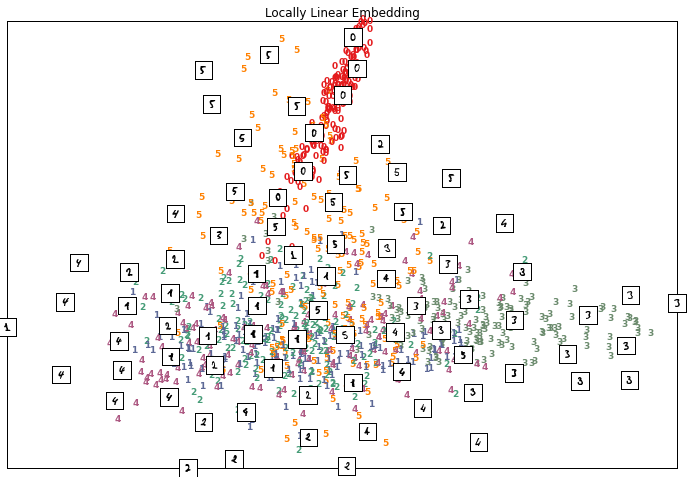

In [12]:
lle = LLE(30)
X_LLE = lle.fit_transform(data)
plot_embedding(mnist,X_LLE,target,"Locally Linear Embedding")
plt.show()

Computing LLE embedding
Done. Reconstruction error: 1.63552e-06


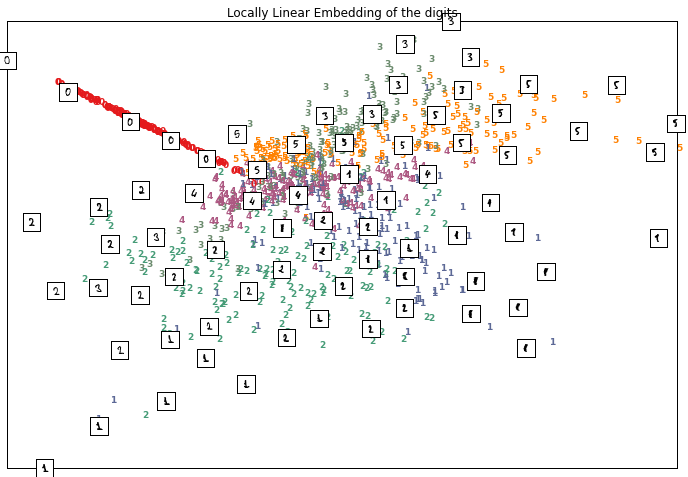

In [13]:
plt.close()
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(30, n_components=2,
                                      method='standard')
X_lle = clf.fit_transform(data)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(mnist,X_lle,target,
               "Locally Linear Embedding of the digits")
plt.show()